<a href="https://colab.research.google.com/github/roshanaryal/cnnmodelforpneumoniadetection/blob/main/pneumonia_detection_using_cnn_new_file_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing dependencies

In [ ]:
pip install imbalanced-learn


In [ ]:
pip install scikeras

# Importing the necessary libraries

In [ ]:
!pip install tensorflowjs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from keras.callbacks import ModelCheckpoint
import pickle
from keras.layers import Lambda
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import tensorflowjs as tfjs



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.11
    Uninstalling flax-0.6.11:
      Successfully uninstalled flax-0.6.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xarray 2022.12.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.


# Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Hiden work

In [ ]:
# import os
# import hashlib
# #
# def delete_duplicate_files(directory):
#     # Create a dictionary to store file hashes
#     file_hashes = {}

#     # Iterate through the subdirectories
#     for root, dirs, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)

#             # Calculate the hash of the file
#             with open(file_path, 'rb') as f:
#                 file_hash = hashlib.md5(f.read()).hexdigest()

#             # Check if the hash already exists in the dictionary
#             if file_hash in file_hashes:
#                 # Delete the duplicate file
#                 os.remove(file_path)
#                 print(f"Deleted duplicate file: {file_path}")
#             else:
#                 # Add the hash to the dictionary
#                 file_hashes[file_hash] = file_path

#     print("Duplicate files have been deleted.")

# # Specify the directory to check for duplicate files
# directory_path = '/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/chest_xray/chest_xray/val/NORMAL/'
# directory_path1 = '/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/chest_xray/chest_xray/val/PNEUMONIA/'

# # Call the function to delete duplicate files
# delete_duplicate_files(directory_path)
# delete_duplicate_files(directory_path1)


# Loading the Dataset

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200
channel=1
scale = cv2.IMREAD_GRAYSCALE if channel == 1 else cv2.IMREAD_COLOR



def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), scale)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/chest_xray/chest_xray/train')
test = get_training_data('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/chest_xray/chest_xray/test')
val = get_training_data('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/chest_xray/chest_xray/val')

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-4-1c872808bb4f>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
print(train.shape)
print(test.shape)
print(val.shape)

(5261, 2)
(618, 2)
(16, 2)


# Saving the loaded data as np array for easy loading next time

In [ ]:
# #saving data so we dont have to load all the time ,run only once
# np.save('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/X_train.npy',train)
# # np.save('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/y_train.npy', y_train)
# np.save('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/X_test.npy', test)
# # np.save('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/y_test.npy', y_test)
# np.save('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/X_val.npy', val)
# # np.save('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/y_val.npy', y_val)
# # # Save other data arrays as needed

In [ ]:
# #load data
# train = np.load('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/X_train.npy')
# # # y_train = np.load('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/y_train.npy')
# #
# test = np.load('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/X_test.npy')
# # # y_test = np.load('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/y_test.npy')

# val = np.load('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/X_val.npy')
# # # y_val = np.load('/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/y_val.npy')
# # # Load other data arrays as needed

# Data Visualization

<Axes: ylabel='count'>

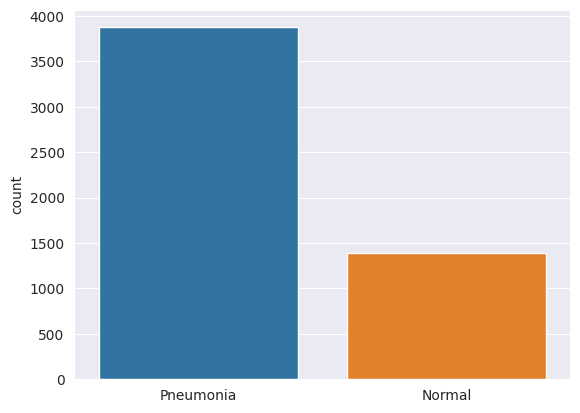

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(x=l)

<Axes: ylabel='count'>

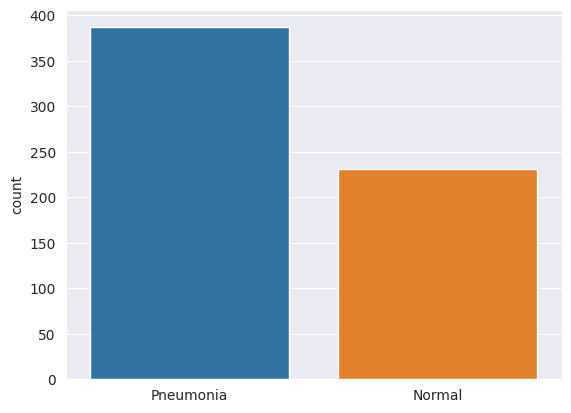

In [ ]:
#for test
l = []
for i in test:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(x=l)


**Previewing the images of both the classes**

Text(0.5, 1.0, 'NORMAL')

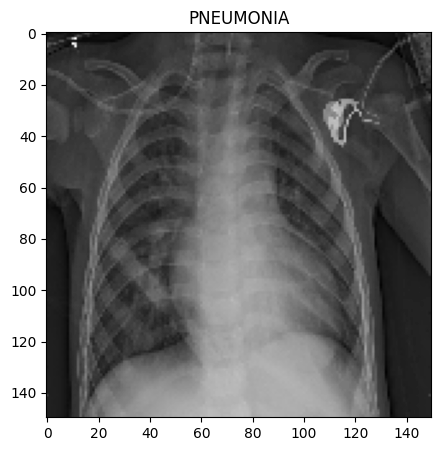

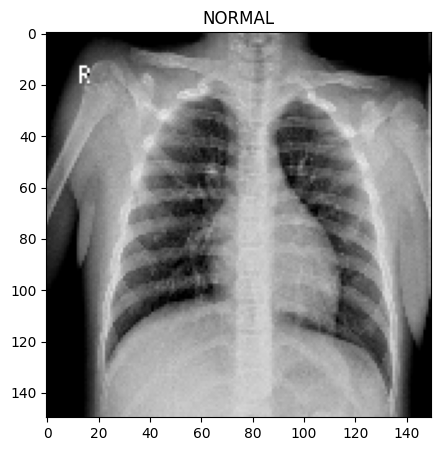

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

#Image Preprocessing

In [ ]:
#histogram equalization
import cv2
import numpy as np

def apply_histogram_equalization(images):
    equalized_images = []
    for image in images:
        # Convert image to grayscale
        # gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Apply histogram equalization
        equalized = cv2.equalizeHist(image)

        # Convert back to RGB
        # equalized_rgb = cv2.cvtColor(equalized, cv2.COLOR_GRAY2RGB)

        equalized_images.append(equalized)

    return np.array(equalized_images)

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
#create np array for all
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
#balancing the dataset
import numpy as np
from imblearn.over_sampling import SMOTE

# Reshape the feature matrix if needed
x_train = np.reshape(x_train, (x_train.shape[0], -1))

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to the training data
x_train, y_train = smote.fit_resample(x_train, y_train)


**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

In [ ]:


#histogram equalization
x_train=apply_histogram_equalization(x_train)
x_test=apply_histogram_equalization(x_test)
x_val=apply_histogram_equalization(x_val)

In [ ]:
# resize data for deep learning

x_train = x_train.reshape(-1, img_size, img_size, channel)
x_val = x_val.reshape(-1, img_size, img_size, channel)
x_test = x_test.reshape(-1, img_size, img_size, channel)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
#print shape
print('Shape of x_train',x_train.shape)
print('Shape of x_val',x_val.shape)
print('Shape of x_test',x_test.shape)

Shape of x_train (7750, 200, 200, 1)
Shape of x_val (16, 200, 200, 1)
Shape of x_test (618, 200, 200, 1)


# Data Augmentation


In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False  # randomly flip images
        # brightness_range=[-0.5, 0.5],  # Adjust brightness randomly between -0.5 and 0.5
        # contrast_range=[0.7, 1.3],  # Adjust contrast randomly between 0.7 and 1.3
        # channel_shift_range=0.1 )#Randomly shift channel values by up to 0.1
        )


datagen.fit(x_train)

# Training the Model

In [ ]:
# #model uusing vgg 16
# from keras.applications import VGG16
# from keras.models import Model
# from keras.layers import Dense

# # Load the VGG16 model with pre-trained weights
# vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the layers of the VGG16 model so they are not trained
# for layer in vgg16.layers:
#     layer.trainable = False

# # Add a custom output layer
# x = vgg16.output
# x = Flatten()(x)
# x = Dense(128, activation='relu')(x)  # Modify the number of units as needed
# x = Dropout(0.2)(x)
# output = Dense(1, activation='sigmoid')(x)  # Modify the number of output classes as needed

# # Create the modified VGG16 model
# model = Model(inputs=vgg16.input, outputs=output)

# # Compile the model
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()



In [ ]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (img_size, img_size, channel)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#new added layer
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

# optimizer
learning_rate = 0.0001
optimizerrms = RMSprop(learning_rate=learning_rate)

model.compile(optimizer = optimizerrms , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 64)     2

In [ ]:
# # Plot the keras model
# keras.utils.plot_model(
#     model,
#     # show the shapes of the input/output tensors of each layer
#     show_shapes=True,
#     # show the data types of the input/output tensors of each layer
#     show_dtype=True,
#     # show the activations of each layer in the output graph
#     show_layer_activations=True
# )

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
# Define the base directory path
base_dir = "/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/modelcheckpoint"

# Find the latest version number
latest_version = 0
for item in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, item)) and not item.startswith("."):
        try:
            version = int(item)
            latest_version = max(latest_version, version)
        except ValueError:
            pass

# Create a new version directory
latest_version += 1
version_dir = os.path.join(base_dir, str(latest_version))
os.makedirs(version_dir, exist_ok=True)

# Create the checkpoint directory if it doesn't exist
checkpoint_dir = os.path.join(version_dir, "checkpoint")
os.makedirs(checkpoint_dir, exist_ok=True)

# Define the checkpoint path
checkpoint_path = os.path.join(checkpoint_dir, 'model_checkpoint.h5')

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True)


In [ ]:
import scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV



# Wrap the Keras model inside the KerasClassifier
keras_model = KerasClassifier(build_fn=model)

# Define the hyperparameters grid
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    # Add other hyperparameters you want to tune
}

# Perform grid search
grid_search = GridSearchCV(keras_model, param_grid, cv=3)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
162/162 [==============================] - 21s 98ms/step - loss: 0.0337 - accuracy: 0.9868
Epoch 2/10
162/162 [==============================] - 15s 93ms/step - loss: 0.0321 - accuracy: 0.9872
Epoch 3/10
162/162 [==============================] - 15s 93ms/step - loss: 0.0274 - accuracy: 0.9888
Epoch 4/10
162/162 [==============================] - 15s 93ms/step - loss: 0.0260 - accuracy: 0.9907
Epoch 5/10
162/162 [==============================] - 15s 93ms/step - loss: 0.0214 - accuracy: 0.9913
Epoch 6/10
162/162 [==============================] - 15s 93ms/step - loss: 0.0198 - accuracy: 0.9909
Epoch 7/10
162/162 [==============================] - 15s 94ms/step - loss: 0.0191 - accuracy: 0.9938
Epoch 8/10
162/162 [==============================] - 15s 93ms/step - loss: 0.0163 - accuracy: 0.9934
Epoch 9/10
162/162 [==============================] - 15s 93ms/step - loss: 0.0189 - accuracy: 0.9934
Epoch 10/10
162/162 [==============================] - 15s 93ms/step - loss: 0.021

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 16 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction,checkpoint])

Epoch 1/16
243/243 [==============================] - 47s 130ms/step - loss: 0.4124 - accuracy: 0.8547 - val_loss: 14.0912 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/16
243/243 [==============================] - 31s 128ms/step - loss: 0.2140 - accuracy: 0.9181 - val_loss: 3.8713 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/16
243/243 [==============================] - ETA: 0s - loss: 0.1641 - accuracy: 0.9379
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
243/243 [==============================] - 31s 128ms/step - loss: 0.1641 - accuracy: 0.9379 - val_loss: 3.6226 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/16
243/243 [==============================] - 32s 132ms/step - loss: 0.1165 - accuracy: 0.9586 - val_loss: 0.9127 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 5/16
243/243 [==============================] - 31s 129ms/step - loss: 0.1038 - accuracy: 0.9615 - val_loss: 0.6299 - val_accuracy: 0.6875 - lr: 3.0000e-04
Epoch 6/16
243/243 [====================

#**Save the model ,history ,and json converted model**

---



In [ ]:
#save the model ,history ,and json converted model
import os
import pickle
import tensorflowjs as tfjs


# Define the base directory path
base_dir = "/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/trainedmodel"

# Find the latest version number
latest_version = 0
for item in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, item)) and not item.startswith("."):
        try:
            version = int(item)
            latest_version = max(latest_version, version)
        except ValueError:
            pass

# Create a new version directory
latest_version += 1
version_dir = os.path.join(base_dir, str(latest_version))
os.makedirs(version_dir, exist_ok=True)

# Create the jsonconverted subdirectory
json_dir = os.path.join(version_dir, "jsonconverted")
os.makedirs(json_dir, exist_ok=True)

# Save the model
model.save(os.path.join(version_dir, "model.h5"))

# Save the history
history_path = os.path.join(version_dir, "history.pkl")
with open(history_path, "wb") as f:
    pickle.dump(history.history, f)


#save message
message = 'tested with image size ' + str(img_size) + ' with adding one more convolution layer with all max pool batch normalization and checking its accuracy..previously we have 1 less layer and we have used image size of 150'
message_path=os.path.join(version_dir, "messageforthisversion.txt")
with open(message_path, 'w') as file:
    file.write(message)

# Convert the model to JSON and save
tfjs.converters.save_keras_model(model, json_dir)


#**Load  the model ,history from latest version**

---



In [ ]:
#read the saved data

import os
import pickle
import tensorflow as tf
import tensorflowjs as tfjs

# Define the base directory path
base_dir = "/content/drive/MyDrive/ColabNotebooks/Pneumonia_detection/trainedmodel"

# Find the latest version number
latest_version = 0
for item in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, item)) and not item.startswith("."):
        try:
            version = int(item)
            latest_version = max(latest_version, version)
        except ValueError:
            pass

# Load the model
model_path = os.path.join(base_dir, str(latest_version), "model.h5")
loaded_model = tf.keras.models.load_model(model_path)

# Load the history
history_path = os.path.join(base_dir, str(latest_version), "history.pkl")
with open(history_path, "rb") as f:
    loaded_history = pickle.load(f)


# Analysis after Model Training

In [ ]:
print("Loss of the model is - " , loaded_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , loaded_model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 1s 29ms/step - loss: 0.3888 - accuracy: 0.8560
Loss of the model is -  0.388837069272995
20/20 [==============================] - 0s 14ms/step - loss: 0.3888 - accuracy: 0.8560
Accuracy of the model is -  85.59870719909668 %


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score


y_pred_probs = loaded_model.predict(x_test)


20/20 [==============================] - 1s 16ms/step


## Calculating best threshold value

In [ ]:
import numpy as np

# Assuming you have the true labels and predicted probabilities
true_labels = y_test
# print(y_test)
# print(y_pred_probs)
predicted_probs = y_pred_probs

# Create an array of different thresholds
thresholds = np.arange(0.0, 1.0, 0.01)

best_threshold = None
best_j_score = 0.0

# Iterate through the thresholds and calculate the J score
for threshold in thresholds:
    predicted_labels = [1 if prob >= threshold else 0 for prob in predicted_probs]

    true_positive = sum([1 for true, pred in zip(true_labels, predicted_labels) if true == 1 and pred == 1])
    true_negative = sum([1 for true, pred in zip(true_labels, predicted_labels) if true == 0 and pred == 0])
    false_positive = sum([1 for true, pred in zip(true_labels, predicted_labels) if true == 0 and pred == 1])
    false_negative = sum([1 for true, pred in zip(true_labels, predicted_labels) if true == 1 and pred == 0])

    sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) != 0 else 0

    j_score = sensitivity + specificity - 1

    if j_score > best_j_score:
        best_j_score = j_score
        best_threshold = threshold

print("Best threshold:", best_threshold)


Best threshold: 0.96


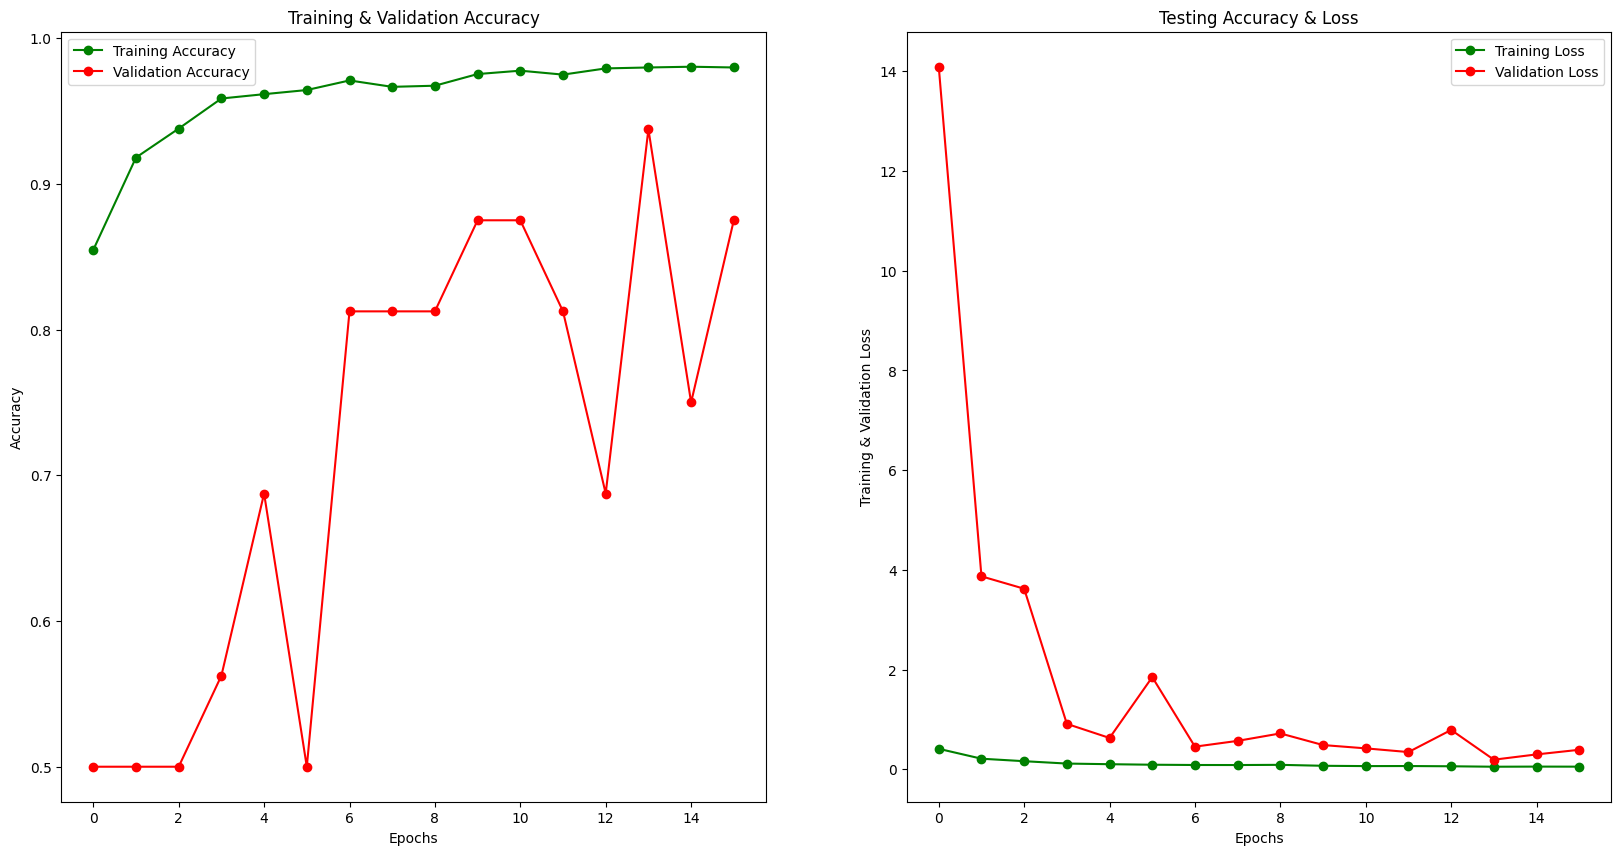

In [ ]:
epochs = [i for i in range(16)]
fig , ax = plt.subplots(1,2)
train_acc = loaded_history['accuracy']
train_loss = loaded_history['loss']
val_acc = loaded_history['val_accuracy']
val_loss = loaded_history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
#for validation data
# Get the number of samples
num_samples = len(x_val)

# Create an array of indices
indices = np.arange(num_samples)

predictions = loaded_model.predict(x_val)
# print(predictions)
threshold = 0.46
predicted_classes = (predictions > threshold).astype(int)
predicted_classes[:num_samples]

1/1 [==============================] - 0s 20ms/step


array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
# # Get the number of samples
num_samples = len(x_test)

# Create an array of indices
indices = np.arange(num_samples)

predictions = loaded_model.predict(x_test)
threshold = 0.46
predicted_classes = (predictions > threshold).astype(int)
predicted_classes = predicted_classes.flatten()
predicted_classes[:100]


20/20 [==============================] - 0s 15ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
# cm = confusion_matrix(y_test,predictions)
threshold=best_threshold
categorical_predictions = np.where(predictions >= threshold, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, categorical_predictions)
cm

array([[369,  18],
       [ 19, 212]])

In [ ]:
#classification report
from sklearn.metrics import classification_report
from keras.utils import to_categorical

# Convert class labels to one-hot encoded format
y_test_onehot = to_categorical(y_test)
# Get the true classes
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Get the model's predictions on the test set
threshold = best_threshold  # Example threshold value

# Apply threshold to convert probabilities to class labels
y_pred_classes = (predictions > threshold).astype(int)


# Generate classification report
report = classification_report(y_test_classes, y_pred_classes)
print(report)




              precision    recall  f1-score   support

           0       0.95      0.95      0.95       387
           1       0.92      0.92      0.92       231

    accuracy                           0.94       618
   macro avg       0.94      0.94      0.94       618
weighted avg       0.94      0.94      0.94       618



In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

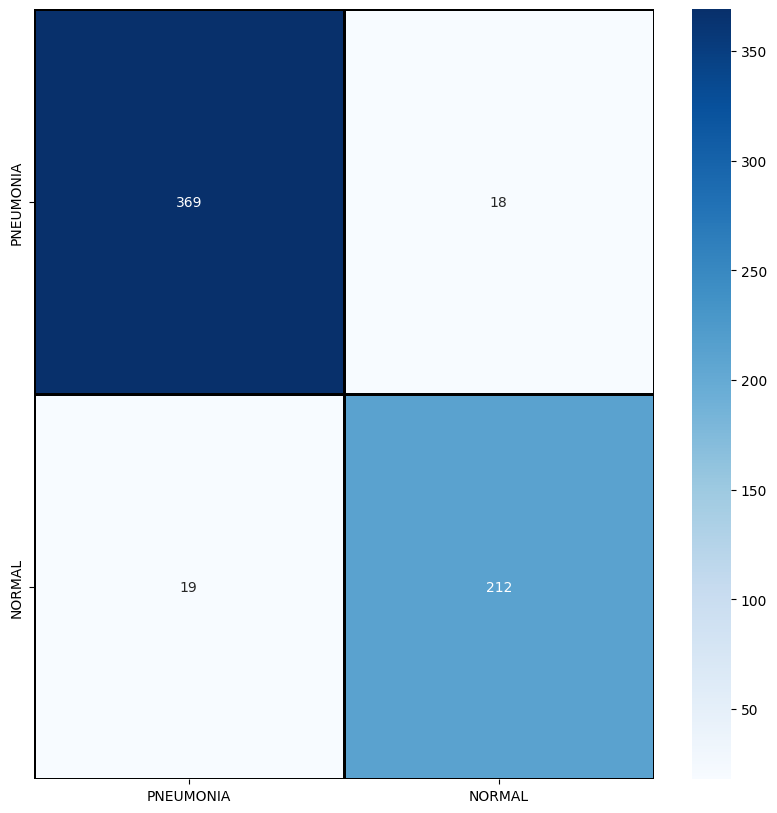

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

###Printing some correctly and incorrectly predicted classes




In [ ]:
correct = np.nonzero(predicted_classes == y_test)[0]
incorrect = np.nonzero(predicted_classes != y_test)[0]
# Shuffle the indices for correct predictions
np.random.shuffle(correct)

# Shuffle the indices for incorrect predictions
np.random.shuffle(incorrect)

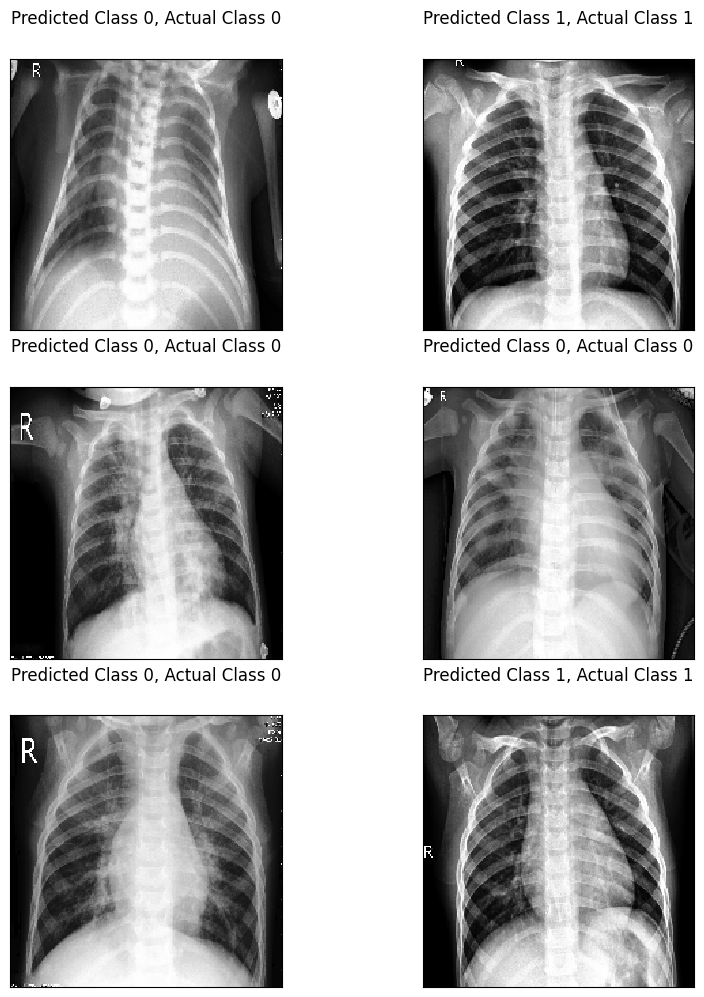

In [ ]:
#correctly predicted classes
i = 0
plt.figure(figsize=(10, 10))  # Increase the figure size

for c in correct[:6]:
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size, img_size), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predicted_classes[c], y_test[c]), y=1.1)  # Adjust the 'y' parameter for title positioning
    plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing between subplots
    i += 1

plt.tight_layout()
plt.show()

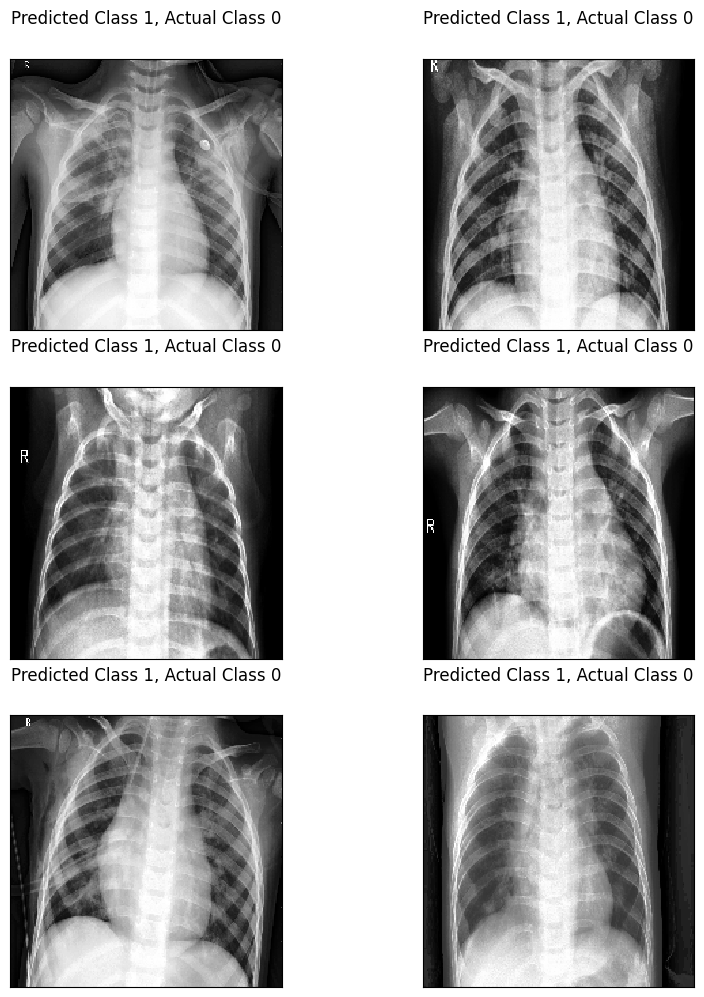

In [ ]:
#incorrectly predicted classes

i = 0
plt.figure(figsize=(10, 10))  # Increase the figure size


for c in incorrect[:6]:
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size, img_size), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predicted_classes[c], y_test[c]), y=1.1)  # Adjust the 'y' parameter for title positioning
    plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing between subplots
    i += 1

plt.tight_layout()
plt.show()